<a href="https://colab.research.google.com/github/LucasRobles2323/Tareas-MetodosNumericos/blob/main/Tarea2_Pregunta1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Pregunta 1**
--

Una universidad en EEUU quiere hacer un estudio de como se relacionan las notas de las 3 pruebas del semestre con la nota final del examen. Para ello cuentan con 25 datos del semestre pasado. Encontrar el modelo de regresión lineal múltiple para realizar esta tarea. (Ejemplo real y se llama “Test Scores for General Psychology”. Descargue el archivo mlr03.xls)


*   Primero realice una regresión lineal simple, en donde utilice la nota de la primera prueba como variable independiente y la nota del examen como la dependiente. Muestre en un gráfico los datos y la recta que se genera.

*   Luego implemente la regresión lineal múltiple con todos los datos.

Verifique la calidad de los modelos calculando la medida de desempeño $R^2$. Debe calcular la métrica de
desempeo para cada uno de los problemas.

**NOTA**
--
Para revisar esta pregunta se debe utilizar el google colab para obtener el archivo CSV mediante un repositorio y el uso de directorio

Funcion para obtener los datos del Excel
--

In [1]:
# Biblioteca para obtener el repositorio de Github
!pip install GitPython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 182 kB 30.5 MB/s 
     |████████████████████████████████| 62 kB 1.4 MB/s 


In [2]:
import git

def ObtenerDatos(exam1, exam2, exam3, final):

  # Comando para clonar el repositorio en una carpeta
  #
  # NOTA: Una vez que se clone la carpeta, debe comentar la siguiente sentencia
  #
  git.Git("/content").clone("https://github.com/vicho-bece/datos_excel.git")

  # Lectura de archivo csv
  with open("/content/datos_excel/mlr03.csv") as Excel:

  # Me salto la primera linea
    next(Excel, None)

  # Leo por lineas, obtengo los datos para cada conjuntos
    for line in Excel:
      datos = line.split(";")
      exam1.append(int(datos[0]))
      exam2.append(int(datos[1]))
      exam3.append(int(datos[2]))
      final.append(int(datos[3]))

exam1 = [] # Lista de Pruebas 1
exam2 = [] # Lista de Pruebas 2
exam3 = [] # Lista de Pruebas 3
final = [] # Lista de Examenes Finales
ObtenerDatos(exam1, exam2, exam3, final)

Regresion Lineal Simple
--

  R^2 = 0.8950500188020497




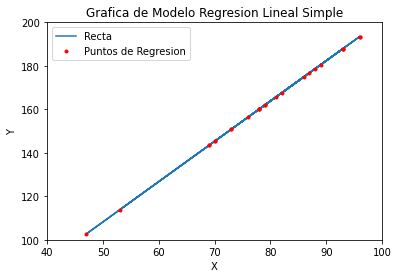

,X,f(X)
0,73,150.851173
1,93,187.900270
2,89,180.490450
3,96,193.457634
4,73,150.851173
5,53,113.802076
6,69,143.441353
7,47,102.687347
8,87,176.785541
9,79,161.965902


In [49]:
import matplotlib.pyplot as plt
import pandas as pd

# Funcion Regresion Lineal Simple
def lineal(xi, a1, a0):
  return ((xi * a1) + a0)

# Funcion para calcular la suma de una multiplicacion
def multiplicar(datos1, datos2):
  sumatoria = 0

  for i in range(0, 25):
    num = (datos1[i]) * (datos2[i])
    sumatoria = sumatoria + num

  return sumatoria  

#--------------------------------------

# Lista de los 'Y' obtenidos de la funcion de Regresion Lineal Simple
y_SIMPLE = [] 

y = final # Variable Dependiente
x = exam1 # Variable Independiente

n = len(x) # Cantidad de datos
sum_x = sum(x) # Sumatoria de los 'X'
sum_y = sum(y) # Sumatoria de los 'Y'
sum_x2 = multiplicar(x, x) # Sumatoria de (X^2) o (X * X)
sum_xy = multiplicar(x, y) # Sumatoria de (X * Y)

# Sumatorias de ST y SR en valor inicial 0
ST_S = 0
SR_S = 0

# Calculo de A1 y A0
A1 = (n * sum_xy - sum_x * sum_y)/(n * sum_x2 - pow(sum_x,2))
A0 = (sum_y/n) - A1 * (sum_x/n)

# Calculo de ST
for i in range(0, 25):
  diff_y = pow(y[i] - (sum_y / n), 2)
  ST_S = ST_S + diff_y

# Calculo de SR y obtengo los 'Y' de la funcion de regresion lineal simple
for i in range(0, 25):
  fun_regresion = lineal(x[i], A1, A0)
  diff_y = pow(y[i] - fun_regresion ,2)
  SR_S = SR_S + diff_y
  y_SIMPLE.append(fun_regresion)

# Calculo de R^2 Medida de desempeño
R2 = (ST_S - SR_S)/ST_S

# Imprimir los datos obtenidos
#print("\nDATOS:"); print("  Cantidad de datos = " + str(n))
#print("  Sumatoria x = " + str(sum_x))
#print("  Sumatoria y = " + str(sum_y))
#print("  Sumatoria x^2 = " + str(sum_x2))
#print("  Sumatoria x*y = " + str(sum_xy))
#print("  A1 = " + str(A1)); print("  A0 = " + str(A0))
#print("  ST = " + str(ST_S)); print("  SR = " + str(SR_S))
print("  R^2 = " + str(R2))
print("\n")

# Genero la grafica
plt.title("Grafica de Modelo Regresion Lineal Simple")
plt.plot(x, y_SIMPLE)
plt.plot(x, y_SIMPLE, 'r.')
plt.ylim(100, 200)
plt.xlim(40, 100)
plt.legend(["Recta", "Puntos de Regresion"])
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# Tabla de los 'X' y los 'Y' de la funcion de regresion lineal
tabla = pd.DataFrame({'X': x, 'f(X)': y_SIMPLE})
tabla

Regresion Lineal Multiple
--

Para calcular los coeficientes se tiene el siguiente metodo:
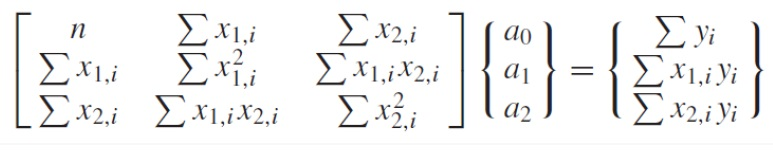

Para el uso de 4 variables en total se tiene la siguiente sistema de matrices:
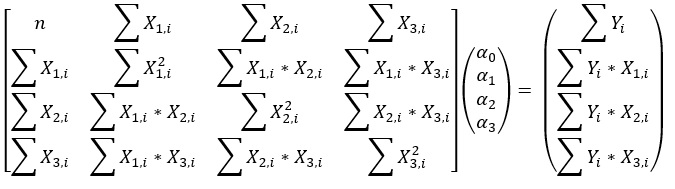

  R^2 = [0.98966158]



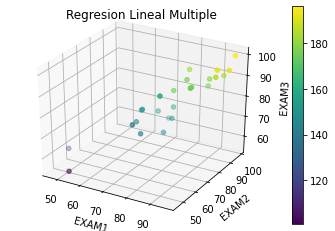

,X1,X2,X3,"f(X1,X2,X3)"
0,73,80,75,[152.6072043917503]
1,93,88,93,[185.08011471901548]
2,89,91,90,[181.7815854683776]
3,96,98,100,[199.7452264651629]
4,73,66,70,[139.17472070367808]
5,53,46,55,[103.69391793383542]
6,69,74,77,[150.2632274039553]
7,47,56,60,[112.82069727946197]
8,87,79,90,[174.55948393962996]
9,79,70,88,[164.49442093920294]


In [51]:
import numpy as np

#Biblioteca para graficar en 3D + Una barra de nivel
from mpl_toolkits.mplot3d import Axes3D

# Funcion de Regresion Lineal Multiple
def multiple(a0, a1, a2, a3, x1, x2, x3):
  return (a0 + a1*x1 + a2*x2 + a3*x3)

x1 = exam1 # Independiente
x2 = exam2 # Independiente
x3 = exam3 # Independiente
y = final # Dependiente

n = len(x1) # Cantidad de datos

# La sumatoria de X1, X2, X3 e Y
sumX1 = sum(x1)
sumX2 = sum(x2)
sumX3 = sum(x3)
sumY = sum(y) 

# La sumatoria de X1, X2, y X3 al cuadrado
sumX1_2 = multiplicar(x1,x1)
sumX2_2 = multiplicar(x2,x2)
sumX3_2 = multiplicar(x3,x3)

# La sumatoria de (X1 * X2), (X1 * X3) y (X2 * X3)
sumX1_X2 = multiplicar(x1,x2)
sumX1_X3 = multiplicar(x1,x3)
sumX2_X3 = multiplicar(x2,x3)

# La sumatoria de (Y * X1), (Y * X2) y (Y * X3)
sumY_X1 = multiplicar(y,x1)
sumY_X2 = multiplicar(y,x2)
sumY_X3 = multiplicar(y,x3)

# La matriz planteada
matriz = np.array([ [n, sumX1, sumX2, sumX3],[sumX1, sumX1_2, sumX1_X2, sumX1_X3], 
                   [sumX2, sumX1_X2, sumX2_2, sumX2_X3],[sumX3, sumX1_X3, sumX2_X3,sumX3_2] ])

# Matriz solucion
solucion = np.array([[sumY],[sumY_X1],[sumY_X2],[sumY_X3]])

# Calculo de los Coeficientes A0, A1, A2 Y A3
a = np.linalg.inv(matriz).dot(solucion)
A0 = a[0]; A1 = a[1]; A2 = a[2]; A3 = a[3]

# Sumatorias de ST y SR en valor inicial 0
ST_M = 0; SR_M = 0

# Calculo del ST
for i in range(0, 25):
  diff_y = pow(y[i] - (sumY / n), 2)
  ST_M = ST_M + diff_y

# Lista de los 'Y' obtenidos de la funcion de Regresion Lineal Multiple
y_MULTIPLE = []

# Calculo del SR y obtengo los Ys de la funcion de regresion
for i in range(0, 25):
  fun_regresion = multiple(A0, A1, A2, A3, x1[i], x2[i], x3[i])
  diff_y = pow(y[i] - fun_regresion ,2)
  SR_M = SR_M + diff_y
  y_MULTIPLE.append(fun_regresion)

# Calculo de R^2 (Medida de desempeño)
R2 = (ST_M - SR_M)/ST_M

#print("DATOS:")
#print(A0)
#print(A1)
#print(A2)
#print(A3)

print("  R^2 = " + str(R2) + "\n")

# Grafico de 3 Dimensiones(x1, x2, x3) + Barra Niveles de Y(Regresion Lineal Multiple)
graph = plt.figure()
ax = graph.add_subplot(111, projection='3d')
plt.title("Regresion Lineal Multiple")
ax.set_xlabel('EXAM1')
ax.set_ylabel('EXAM2')
ax.set_zlabel('EXAM3')
img = ax.scatter(x1, x2, x3, c=y, cmap='viridis')
graph.colorbar(img)
plt.show()

#Tabla de respaldo de los ejes e y de regresion
tabla = pd.DataFrame({'X1': x1, 'X2': x2, 'X3' : x3, 'f(X1,X2,X3)' : y_MULTIPLE})
tabla

Informacion de como construir el grafico:

Link: https://stackoverflow.com/questions/14995610/how-to-make-a-4d-plot-with-matplotlib-using-arbitrary-data 